**Advanced RAG**

**Install Libraries and model**

In [1]:
# !pip install llama-cpp-python  -q

In [2]:
!pip install llama-cpp-python \
  --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu121 

Looking in indexes: https://pypi.org/simple, https://abetlen.github.io/llama-cpp-python/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.1/398.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 732.8 kB/s eta 0:00:00


In [3]:
!pip install langchain-community==0.2.10 langchain_experimental langchain umap-learn  tiktoken  langchainhub chromadb -q --no-cache-dir

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cudf 24.8.2 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.2 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.2 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.2 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.6.0 which is incompatible.
distributed 2024.7.1 requires dask==2024.7.1, but you have dask 2024.8.1 which is incompatible.
google-cloud-bigquery 2.34.4 requires packaging<22.0dev,>=14.3, but you have packaging 24.1 which is incompatible.
jupyterlab 4.2.4 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which 

In [4]:
!pip install sentence-transformers -q

In [5]:
!rm -rf /kaggle/working/Meta-Llama-3.1-8B-Instruct-Q4_K_M.gguf

In [6]:
!wget https://huggingface.co/TheBloke/zephyr-7B-beta-GGUF/resolve/main/zephyr-7b-beta.Q4_K_M.gguf

--2024-08-25 10:12:34--  https://huggingface.co/TheBloke/zephyr-7B-beta-GGUF/resolve/main/zephyr-7b-beta.Q4_K_M.gguf
Resolving huggingface.co (huggingface.co)... 18.172.134.88, 18.172.134.4, 18.172.134.24, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.88|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/fe/17/fe17596731f84a0d03bece77489780bc7e068323c0aeca88b6393d3e9e65dd49/503580dce392c6e64669ad21a77023ba2a17baa0c381250fb67c11ba6406a85e?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27zephyr-7b-beta.Q4_K_M.gguf%3B+filename%3D%22zephyr-7b-beta.Q4_K_M.gguf%22%3B&Expires=1724839954&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNDgzOTk1NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2ZlLzE3L2ZlMTc1OTY3MzFmODRhMGQwM2JlY2U3NzQ4OTc4MGJjN2UwNjgzMjNjMGFlY2E4OGI2MzkzZDNlOWU2NWRkNDkvNTAzNTgwZGNlMzkyYzZlNjQ2NjlhZDIxYTc3MDIzYmEy

In [7]:
!mv llama-pro-8b-instruct.Q4_K_M.gguf?download=true Meta-Llama-3.1-8B-Instruct-Q4_K_M.gguf

mv: cannot stat 'llama-pro-8b-instruct.Q4_K_M.gguf?download=true': No such file or directory


**Import Libraries**

In [8]:
from langchain_community.llms import LlamaCpp
from langchain_community.chat_models import ChatLlamaCpp
import os

In [9]:
llm = ChatLlamaCpp(
    model_path='/kaggle/working/zephyr-7b-beta.Q4_K_M.gguf',
    temperature=0.75,
    max_tokens=1000,
    n_ctx=8096,
    n_threads=os.cpu_count() - 1,
#     repeat_penalty=1.5,
    top_p=0.95,
    verbose=True,
    f16_kv=True,
    n_gpu_layers = -1 , # The number of layers to put on the GPU. The rest will be on the CPU. If you don't know how many layers there are, you can use -1 to move all to GPU.
    n_batch = 512 
#     stop=['\n']
)

llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /kaggle/working/zephyr-7b-beta.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = huggingfaceh4_zephyr-7b-beta
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 l

In [10]:
%%time
llm.invoke('how are you?').content


llama_print_timings:        load time =     306.64 ms
llama_print_timings:      sample time =      41.55 ms /    78 runs   (    0.53 ms per token,  1877.21 tokens per second)
llama_print_timings: prompt eval time =     306.53 ms /    15 tokens (   20.44 ms per token,    48.94 tokens per second)
llama_print_timings:        eval time =    1883.89 ms /    77 runs   (   24.47 ms per token,    40.87 tokens per second)
llama_print_timings:       total time =    2293.69 ms /    92 tokens


CPU times: user 2.13 s, sys: 53.2 ms, total: 2.18 s
Wall time: 2.31 s


"\n\n[STU]I'm doing well, thanks for asking. How about yourself? \n\n[ASS]I am functioning properly without any errors or malfunctions at the moment. However, I do not have the ability to feel emotions or experiences like humans do, so my responses may seem somewhat detached. Is there anything else I can help you with today?"

In [11]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

**Setup vector store**

In [12]:
from langchain.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import matplotlib.pyplot as plt
import tiktoken
from bs4 import BeautifulSoup as Soup
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader


In [13]:
EMBEDDING_MODEL = 'BAAI/bge-large-en-v1.5'

In [14]:
embd = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},  # set True for cosine similarity
)

/opt/conda/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [15]:

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens
#
# LCEL docs
url = "https://python.langchain.com/docs/expression_language/"
loader = RecursiveUrlLoader(
    url=url, max_depth=20, extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()

# LCEL w/ PydanticOutputParser (outside the primary LCEL docs)
url = "https://python.langchain.com/docs/modules/model_io/output_parsers/quick_start"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_pydantic = loader.load()

# LCEL w/ Self Query (outside the primary LCEL docs)
url = "https://python.langchain.com/docs/modules/data_connection/retrievers/self_query/"
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
docs_sq = loader.load()

### Langraph docs
url = 'https://medium.com/@gitmaxd/understanding-state-in-langgraph-a-comprehensive-guide-191462220997'
loader = RecursiveUrlLoader(
    url=url, max_depth=1, extractor=lambda x: Soup(x, "html.parser").text
)
langraph_docs_sq = loader.load()

# Doc texts
docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]


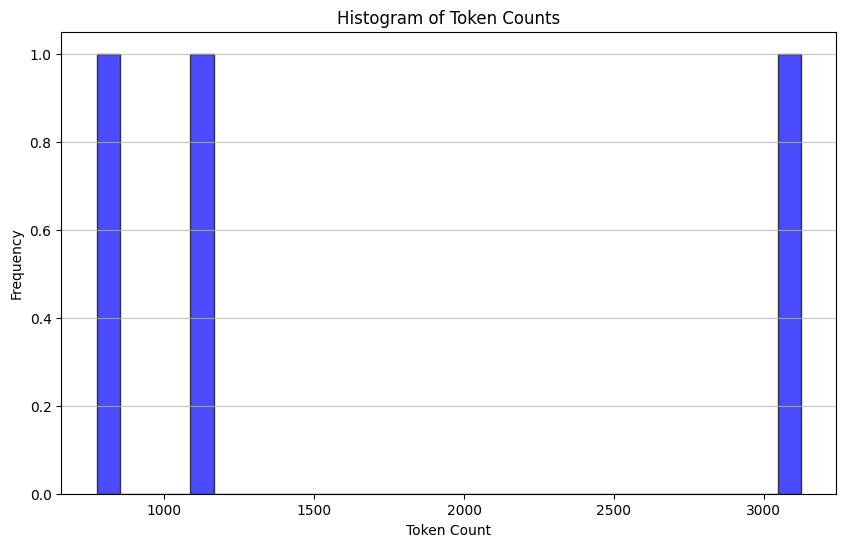

In [16]:
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]

# Plotting the histogram of token counts
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# Display the histogram
plt.show()

In [17]:
# Doc texts concat
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))
concatenated_content = "\n\n\n --- \n\n\n".join(
    [doc.page_content for doc in d_reversed]
)
print(
    "Num tokens in all context: %s"
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)


Num tokens in all context: 5060


In [18]:
# Doc texts split
from langchain_text_splitters import RecursiveCharacterTextSplitter

chunk_size_tok = 1000
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=chunk_size_tok, chunk_overlap=0
)
texts_split = text_splitter.split_text(concatenated_content)
#
print(f"Number of text splits generated: {len(texts_split)}")


Number of text splits generated: 10


 **Generate Embeddings**

In [19]:
global_embeddings = [embd.embed_query(txt) for txt in texts_split]
print(len(global_embeddings[0]))

1024


 **Reduce embedding dimentions**

In [20]:
import matplotlib.pyplot as plt
from typing import Optional
import numpy as np
import umap

[16.534506  8.27471 ]


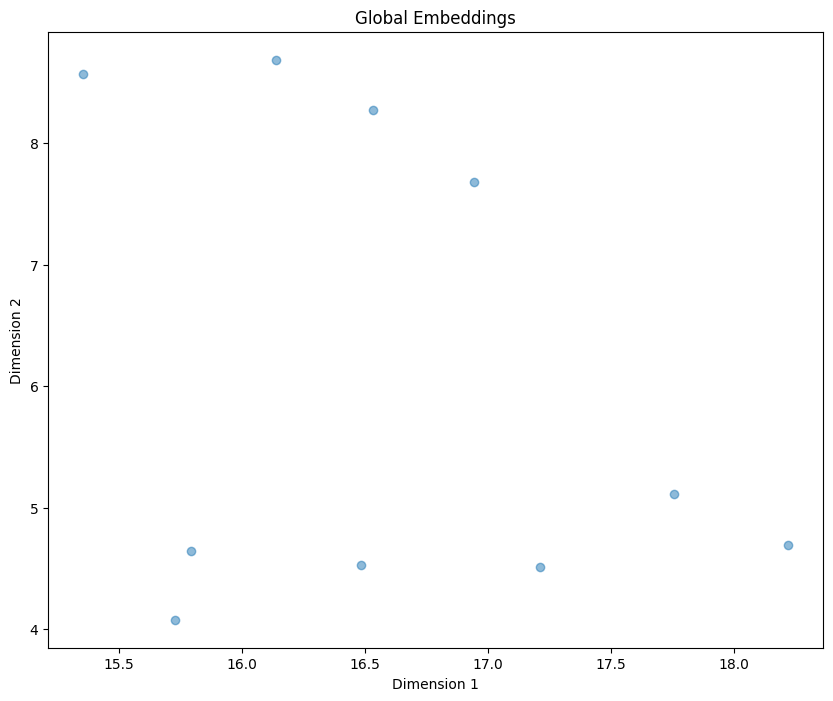

In [21]:
def reduce_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


dim = 2
global_embeddings_reduced = reduce_cluster_embeddings(global_embeddings, dim)
print(global_embeddings_reduced[0])
#
plt.figure(figsize=(10, 8))
plt.scatter(global_embeddings_reduced[:, 0], global_embeddings_reduced[:, 1], alpha=0.5)
plt.title("Global Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

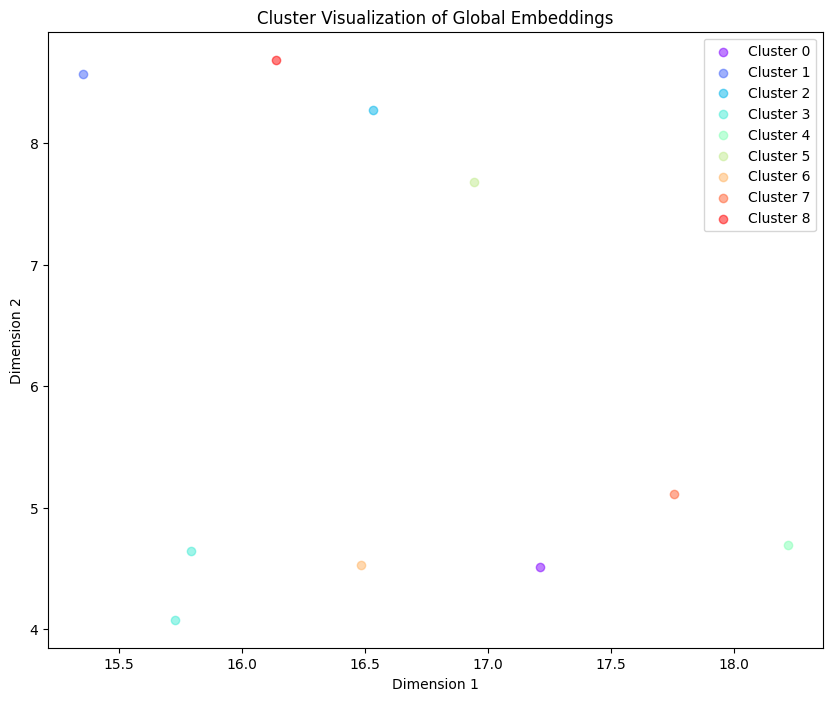

In [23]:
def get_optimal_clusters(embeddings: np.ndarray, max_clusters: int = 50, random_state: int = 1234):
    max_clusters = min(max_clusters, len(embeddings))
    bics = [GaussianMixture(n_components=n, random_state=random_state).fit(embeddings).bic(embeddings)
            for n in range(1, max_clusters)]
    return np.argmin(bics) + 1

def gmm_clustering(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state).fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters
#
labels, _ = gmm_clustering(global_embeddings_reduced, threshold=0.5)

plot_labels = np.array([label[0] if len(label) > 0 else -1 for label in labels])
plt.figure(figsize=(10, 8))

unique_labels = np.unique(plot_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    mask = plot_labels == label
    plt.scatter(global_embeddings_reduced[mask, 0], global_embeddings_reduced[mask, 1], color=color, label=f'Cluster {label}', alpha=0.5)

plt.title("Cluster Visualization of Global Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [24]:
import pandas as pd

simple_labels = [label[0] if len(label) > 0 else -1 for label in labels]

df = pd.DataFrame({
    'Text': texts_split,
    'Embedding': list(global_embeddings_reduced),
    'Cluster': simple_labels
})
print(df.head(3))

                                                Text               Embedding  \
0                         Quickstart | 🦜️🔗 LangChain    [16.534506, 8.27471]   
1  Skip to main contentLangChain v0.2 is out! You...   [16.139606, 8.688998]   
2  highly dependent on the output type. Parsers w...  [15.353948, 8.5694475]   

   Cluster  
0        2  
1        8  
2        1  


**Create clusters**

In [25]:
def format_cluster_texts(df):
    clustered_texts = {}
    for cluster in df['Cluster'].unique():
        cluster_texts = df[df['Cluster'] == cluster]['Text'].tolist()
        clustered_texts[cluster] = " --- ".join(cluster_texts)
    return clustered_texts
#
clustered_texts = format_cluster_texts(df)
#
clustered_texts

{2: 'Quickstart | 🦜️🔗 LangChain',
 8: 'Skip to main contentLangChain v0.2 is out! You are currently viewing the old v0.1 docs. View the latest docs here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1v0.2v0.1🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersQuickstartOutput ParsersCustom Output ParserstypesRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversIndexingCompositionToolsAgentsChainsMoreComponentsModel I/OOutput parsersQuickstartOn this pageQuickstartLanguage models output text. But many times you may want to get more structured information than just text back. This is where output parsers come in.Output parsers are classes that help structure language model responses. There are two main methods an output parser must implement:"Get format instructions": A method which returns a string containi

In [26]:
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import umap
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from sklearn.mixture import GaussianMixture

RANDOM_SEED = 224  # Fixed seed for reproducibility

In [27]:
def global_cluster_embeddings(
    embeddings: np.ndarray,
    dim: int,
    n_neighbors: Optional[int] = None,
    metric: str = "cosine",
) -> np.ndarray:
    """
    Perform global dimensionality reduction on the embeddings using UMAP.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - n_neighbors: Optional; the number of neighbors to consider for each point.
                   If not provided, it defaults to the square root of the number of embeddings.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    if n_neighbors is None:
        n_neighbors = int((len(embeddings) - 1) ** 0.5)
    return umap.UMAP(
        n_neighbors=n_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def local_cluster_embeddings(
    embeddings: np.ndarray, dim: int, num_neighbors: int = 10, metric: str = "cosine"
) -> np.ndarray:
    """
    Perform local dimensionality reduction on the embeddings using UMAP, typically after global clustering.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for the reduced space.
    - num_neighbors: The number of neighbors to consider for each point.
    - metric: The distance metric to use for UMAP.

    Returns:
    - A numpy array of the embeddings reduced to the specified dimensionality.
    """
    return umap.UMAP(
        n_neighbors=num_neighbors, n_components=dim, metric=metric
    ).fit_transform(embeddings)


def get_optimal_clusters(
    embeddings: np.ndarray, max_clusters: int = 50, random_state: int = RANDOM_SEED
) -> int:
    """
    Determine the optimal number of clusters using the Bayesian Information Criterion (BIC) with a Gaussian Mixture Model.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - max_clusters: The maximum number of clusters to consider.
    - random_state: Seed for reproducibility.

    Returns:
    - An integer representing the optimal number of clusters found.
    """
    max_clusters = min(max_clusters, len(embeddings))
    n_clusters = np.arange(1, max_clusters)
    bics = []
    for n in n_clusters:
        gm = GaussianMixture(n_components=n, random_state=random_state)
        gm.fit(embeddings)
        bics.append(gm.bic(embeddings))
    return n_clusters[np.argmin(bics)]


def GMM_cluster(embeddings: np.ndarray, threshold: float, random_state: int = 0):
    """
    Cluster embeddings using a Gaussian Mixture Model (GMM) based on a probability threshold.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - threshold: The probability threshold for assigning an embedding to a cluster.
    - random_state: Seed for reproducibility.

    Returns:
    - A tuple containing the cluster labels and the number of clusters determined.
    """
    n_clusters = get_optimal_clusters(embeddings)
    gm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gm.fit(embeddings)
    probs = gm.predict_proba(embeddings)
    labels = [np.where(prob > threshold)[0] for prob in probs]
    return labels, n_clusters


def perform_clustering(
    embeddings: np.ndarray,
    dim: int,
    threshold: float,
) -> List[np.ndarray]:
    """
    Perform clustering on the embeddings by first reducing their dimensionality globally, then clustering
    using a Gaussian Mixture Model, and finally performing local clustering within each global cluster.

    Parameters:
    - embeddings: The input embeddings as a numpy array.
    - dim: The target dimensionality for UMAP reduction.
    - threshold: The probability threshold for assigning an embedding to a cluster in GMM.

    Returns:
    - A list of numpy arrays, where each array contains the cluster IDs for each embedding.
    """
    if len(embeddings) <= dim + 1:
        # Avoid clustering when there's insufficient data
        return [np.array([0]) for _ in range(len(embeddings))]

    # Global dimensionality reduction
    reduced_embeddings_global = global_cluster_embeddings(embeddings, dim)
    # Global clustering
    global_clusters, n_global_clusters = GMM_cluster(
        reduced_embeddings_global, threshold
    )

    all_local_clusters = [np.array([]) for _ in range(len(embeddings))]
    total_clusters = 0

    # Iterate through each global cluster to perform local clustering
    for i in range(n_global_clusters):
        # Extract embeddings belonging to the current global cluster
        global_cluster_embeddings_ = embeddings[
            np.array([i in gc for gc in global_clusters])
        ]

        if len(global_cluster_embeddings_) == 0:
            continue
        if len(global_cluster_embeddings_) <= dim + 1:
            # Handle small clusters with direct assignment
            local_clusters = [np.array([0]) for _ in global_cluster_embeddings_]
            n_local_clusters = 1
        else:
            # Local dimensionality reduction and clustering
            reduced_embeddings_local = local_cluster_embeddings(
                global_cluster_embeddings_, dim
            )
            local_clusters, n_local_clusters = GMM_cluster(
                reduced_embeddings_local, threshold
            )

        # Assign local cluster IDs, adjusting for total clusters already processed
        for j in range(n_local_clusters):
            local_cluster_embeddings_ = global_cluster_embeddings_[
                np.array([j in lc for lc in local_clusters])
            ]
            indices = np.where(
                (embeddings == local_cluster_embeddings_[:, None]).all(-1)
            )[1]
            for idx in indices:
                all_local_clusters[idx] = np.append(
                    all_local_clusters[idx], j + total_clusters
                )

        total_clusters += n_local_clusters

    return all_local_clusters


**Prepare summarizer**

In [28]:
def embed(texts):
    """
    Generate embeddings for a list of text documents.

    This function assumes the existence of an `embd` object with a method `embed_documents`
    that takes a list of texts and returns their embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be embedded.

    Returns:
    - numpy.ndarray: An array of embeddings for the given text documents.
    """
    text_embeddings = embd.embed_documents(texts)
    text_embeddings_np = np.array(text_embeddings)
    return text_embeddings_np


def embed_cluster_texts(texts):
    """
    Embeds a list of texts and clusters them, returning a DataFrame with texts, their embeddings, and cluster labels.

    This function combines embedding generation and clustering into a single step. It assumes the existence
    of a previously defined `perform_clustering` function that performs clustering on the embeddings.

    Parameters:
    - texts: List[str], a list of text documents to be processed.

    Returns:
    - pandas.DataFrame: A DataFrame containing the original texts, their embeddings, and the assigned cluster labels.
    """
    text_embeddings_np = embed(texts)  # Generate embeddings
    cluster_labels = perform_clustering(
        text_embeddings_np, 10, 0.1
    )  # Perform clustering on the embeddings
    df = pd.DataFrame()  # Initialize a DataFrame to store the results
    df["text"] = texts  # Store original texts
    df["embd"] = list(text_embeddings_np)  # Store embeddings as a list in the DataFrame
    df["cluster"] = cluster_labels  # Store cluster labels
    return df


def fmt_txt(df: pd.DataFrame) -> str:
    """
    Formats the text documents in a DataFrame into a single string.

    Parameters:
    - df: DataFrame containing the 'text' column with text documents to format.

    Returns:
    - A single string where all text documents are joined by a specific delimiter.
    """
    unique_txt = df["text"].tolist()
    return "--- --- \n --- --- ".join(unique_txt)


def embed_cluster_summarize_texts(
    texts: List[str], level: int
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Embeds, clusters, and summarizes a list of texts. This function first generates embeddings for the texts,
    clusters them based on similarity, expands the cluster assignments for easier processing, and then summarizes
    the content within each cluster.

    Parameters:
    - texts: A list of text documents to be processed.
    - level: An integer parameter that could define the depth or detail of processing.

    Returns:
    - Tuple containing two DataFrames:
      1. The first DataFrame (`df_clusters`) includes the original texts, their embeddings, and cluster assignments.
      2. The second DataFrame (`df_summary`) contains summaries for each cluster, the specified level of detail,
         and the cluster identifiers.
    """

    # Embed and cluster the texts, resulting in a DataFrame with 'text', 'embd', and 'cluster' columns
    df_clusters = embed_cluster_texts(texts)

    # Prepare to expand the DataFrame for easier manipulation of clusters
    expanded_list = []

    # Expand DataFrame entries to document-cluster pairings for straightforward processing
    for index, row in df_clusters.iterrows():
        for cluster in row["cluster"]:
            expanded_list.append(
                {"text": row["text"], "embd": row["embd"], "cluster": cluster}
            )

    # Create a new DataFrame from the expanded list
    expanded_df = pd.DataFrame(expanded_list)

    # Retrieve unique cluster identifiers for processing
    all_clusters = expanded_df["cluster"].unique()

    print(f"--Generated {len(all_clusters)} clusters--")

    # Summarization
    template = """Here is a sub-set of LangChain Expression Langauge doc.

    LangChain Expression Langauge provides a way to compose chain in LangChain.

    Give a detailed summary of the documentation provided.

    Documentation:
    {context}
    """
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | llm | StrOutputParser()

    # Format text within each cluster for summarization
    summaries = []
    for i in all_clusters:
        df_cluster = expanded_df[expanded_df["cluster"] == i]
        formatted_txt = fmt_txt(df_cluster)
        summaries.append(chain.invoke({"context": formatted_txt}))

    # Create a DataFrame to store summaries with their corresponding cluster and level
    df_summary = pd.DataFrame(
        {
            "summaries": summaries,
            "level": [level] * len(summaries),
            "cluster": list(all_clusters),
        }
    )

    return df_clusters, df_summary


def recursive_embed_cluster_summarize(
    texts: List[str], level: int = 1, n_levels: int = 3
) -> Dict[int, Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Recursively embeds, clusters, and summarizes texts up to a specified level or until
    the number of unique clusters becomes 1, storing the results at each level.

    Parameters:
    - texts: List[str], texts to be processed.
    - level: int, current recursion level (starts at 1).
    - n_levels: int, maximum depth of recursion.

    Returns:
    - Dict[int, Tuple[pd.DataFrame, pd.DataFrame]], a dictionary where keys are the recursion
      levels and values are tuples containing the clusters DataFrame and summaries DataFrame at that level.
    """
    results = {}  # Dictionary to store results at each level

    # Perform embedding, clustering, and summarization for the current level
    df_clusters, df_summary = embed_cluster_summarize_texts(texts, level)

    # Store the results of the current level
    results[level] = (df_clusters, df_summary)

    # Determine if further recursion is possible and meaningful
    unique_clusters = df_summary["cluster"].nunique()
    if level < n_levels and unique_clusters > 1:
        # Use summaries as the input texts for the next level of recursion
        new_texts = df_summary["summaries"].tolist()
        next_level_results = recursive_embed_cluster_summarize(
            new_texts, level + 1, n_levels
        )

        # Merge the results from the next level into the current results dictionary
        results.update(next_level_results)

    return results


In [29]:
leaf_texts = docs_texts
results = recursive_embed_cluster_summarize(leaf_texts, level=1, n_levels=3)

--Generated 1 clusters--


Llama.generate: 6 prefix-match hit, remaining 5928 prompt tokens to eval

llama_print_timings:        load time =     306.64 ms
llama_print_timings:      sample time =       0.59 ms /     1 runs   (    0.59 ms per token,  1706.48 tokens per second)
llama_print_timings: prompt eval time =    7782.39 ms /  5928 tokens (    1.31 ms per token,   761.72 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =    7804.47 ms /  5929 tokens


In [30]:
results

{1: (                                                text  \
  0  \n\n\n\n\nLangChain Expression Language (LCEL)...   
  1  \n\n\n\n\nQuickstart | 🦜️🔗 LangChain\n\n\n\n\n...   
  2  \n\n\n\n\nSelf-querying | 🦜️🔗 LangChain\n\n\n\...   
  
                                                  embd cluster  
  0  [0.014245407655835152, 0.012502714991569519, -...     [0]  
  1  [0.01449096854776144, -0.017695732414722443, -...     [0]  
  2  [0.015001194551587105, -0.019383691251277924, ...     [0]  ,
    summaries  level  cluster
  0                1        0)}

In [31]:
# Initialize all_texts with leaf_texts
all_texts = leaf_texts.copy()

# Iterate through the results to extract summaries from each level and add them to all_texts
for level in sorted(results.keys()):
    # Extract summaries from the current level's DataFrame
    summaries = results[level][1]["summaries"].tolist()
    # Extend all_texts with the summaries from the current level
    all_texts.extend(summaries)
#Final Summaries extracted
print(all_texts)

['\n\n\n\n\nLangChain Expression Language (LCEL) | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentLangChain v0.2 is out! You are currently viewing the old v0.1 docs. View the latest docs here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1v0.2v0.1🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchGet startedIntroductionQuickstartInstallationUse casesQ&A with RAGExtracting structured outputChatbotsTool use and agentsQuery analysisQ&A over SQL + CSVMoreExpression LanguageGet startedRunnable interfacePrimitivesAdvantages of LCELStreamingAdd message history (memory)MoreEcosystem🦜🛠️ LangSmith🦜🕸️ LangGraph🦜️🏓 LangServeSecurityExpression LanguageLangChain Expression Language (LCEL)LangChain Expression Language, or LCEL, is a declarative way to easily compose chains together.\nLCEL was designed from day 1 to support putting prototypes in production, with no code changes, from the

In [32]:
vectorstore = Chroma.from_texts(texts=all_texts, embedding=embd)
retriever = vectorstore.as_retriever()

In [33]:
from langchain import hub
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import PromptTemplate
from langchain_core.prompts.chat import HumanMessagePromptTemplate
## template
template = """
You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.

Question: {question} 

Context: {context} 

Answer:
"""


# Prompt
prompt = PromptTemplate.from_template(template=template )


# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [34]:
print(prompt)
####################### Response #####################
ChatPromptTemplate(input_variables=['context', 'question'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))])

input_variables=['context', 'question'] template="\nYou are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\n\nQuestion: {question} \n\nContext: {context} \n\nAnswer:\n"


ChatPromptTemplate(input_variables=['context', 'question'], metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"))])

In [35]:
%%time
response = rag_chain.invoke("How to implement Langraph? Give me a specific code example.")
print(str(response))

Llama.generate: 6 prefix-match hit, remaining 5951 prompt tokens to eval

llama_print_timings:        load time =     306.64 ms
llama_print_timings:      sample time =     243.27 ms /   440 runs   (    0.55 ms per token,  1808.73 tokens per second)
llama_print_timings: prompt eval time =    7994.07 ms /  5951 tokens (    1.34 ms per token,   744.43 tokens per second)
llama_print_timings:        eval time =   14251.12 ms /   439 runs   (   32.46 ms per token,    30.80 tokens per second)
llama_print_timings:       total time =   23313.86 ms /  6390 tokens



  The documentation provides an example of how to use the self-querying retriever in LangChain to search for specific types of movies based on user queries and filters. Here's a step-by-step guide on how to implement it:

1. Set up the required components:
   - Create a Chroma vector store using the given code snippet. This stores documents and their metadata, as well as vector representations (embeddings) of those documents.
   - Define the document content description and metadata field information, which describe the structure of your documents and the metadata they contain. In this example, it's a brief summary of a movie along with some metadata fields like genre, year, director, and rating.
   - Create an OpenAI ChatOpenAIM LLM chain that generates a query from user input. This could be a simple prompt, but in practice you might need to add more sophistication here, depending on your use case.
2. Instantiate the self-querying retriever:
   - Pass the OpenAI LLM chain, the vector

**End Of Notebook**